In [71]:
import Metrica_IO as mio
import Metrica_Viz as mviz

# set up initial path to data
DATADIR = 'metrica_data'

game_id = 2 # let's look at sample match 2

# read in the event data
events = mio.read_event_data(DATADIR,game_id)

In [72]:
events

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.50,0.50,0.40,0.51
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,0.43,0.50,0.44,0.22
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,0.47,0.19,0.31,0.28
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,0.29,0.32,0.26,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,Away,BALL LOST,INTERCEPTION,2,140122,5604.88,140183,5607.32,Player21,NaN,0.54,0.77,0.29,0.24
1931,Home,CHALLENGE,AERIAL-LOST,2,140180,5607.20,140180,5607.20,Player1,NaN,0.31,0.30,NaN,NaN
1932,Away,CHALLENGE,AERIAL-LOST,2,140183,5607.32,140183,5607.32,Player24,NaN,0.32,0.30,NaN,NaN
1933,Home,RECOVERY,NaN,2,140211,5608.44,140211,5608.44,Player12,NaN,0.34,0.32,NaN,NaN


In [73]:
# count the number of each event type in the data
events['Type'].value_counts() 

PASS              964
CHALLENGE         311
RECOVERY          248
BALL LOST         233
SET PIECE          80
BALL OUT           49
SHOT               24
FAULT RECEIVED     20
CARD                6
Name: Type, dtype: int64

In [74]:
# Bit of housekeeping: unit conversion from metric data units to meters
events = mio.to_metric_coordinates(events)

In [75]:
# Get events by team
home_events = events[events['Team']=='Home']
away_events = events[events['Team']=='Away']

In [76]:
# Get all shots
shots = events[events['Type']=='SHOT']
home_shots = home_events[home_events.Type=='SHOT']
away_shots = away_events[away_events.Type=='SHOT']

In [77]:
# Get all the goals
goals = shots[shots['Subtype'].str.contains('-GOAL')].copy()

In [78]:
goals

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,-47.70,-3.40,-54.06,-2.04
823,Away,SHOT,ON TARGET-GOAL,1,53049,2121.96,53075,2123.00,Player24,NaN,44.52,2.72,54.06,1.36
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.80,Player9,NaN,47.70,-1.36,54.06,-2.04
1671,Away,SHOT,ON TARGET-GOAL,2,115009,4600.36,115024,4600.96,Player20,NaN,-40.28,-1.36,-55.12,-2.72
1723,Home,SHOT,ON TARGET-GOAL,2,121027,4841.08,121055,4842.20,Player12,NaN,30.74,-5.44,54.06,-2.72


In [79]:
# Get the shots that led to a goal
home_goals = home_shots[home_shots['Subtype'].str.contains('-GOAL')].copy()
away_goals = away_shots[away_shots['Subtype'].str.contains('-GOAL')].copy()

In [80]:
# Add a column event 'Minute' to the data frame
home_goals['Minute'] = home_goals['Start Time [s]']/60.

Text(-47.7, -3.400000000000003, '')

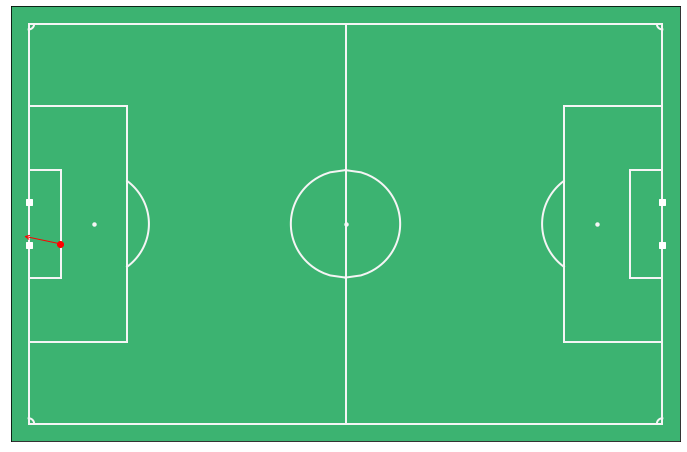

In [81]:
# Plot the first goal
fig,ax = mviz.plot_pitch()
ax.plot( events.loc[198]['Start X'], events.loc[198]['Start Y'],'ro' )
ax.annotate("", xy=events.loc[198][['End X','End Y']], xytext=events.loc[198][['Start X','Start Y']], alpha=0.6, arrowprops=dict(arrowstyle="->",color='r'))

(<Figure size 864x576 with 1 Axes>, <AxesSubplot:>)

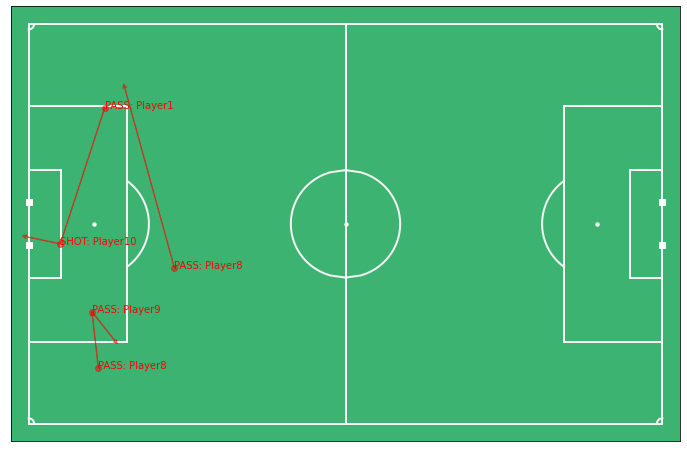

In [82]:
# plot passing move in run up to goal
mviz.plot_events( events.loc[194:198], indicators = ['Marker','Arrow'], annotate=True )

In [83]:
#### TRACKING DATA ####

# READING IN TRACKING DATA
tracking_home = mio.tracking_data(DATADIR,game_id,'Home')
tracking_away = mio.tracking_data(DATADIR,game_id,'Away')

Reading team: home
Reading team: away


In [84]:
# Convert positions from metrica units to meters 
tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)

<ipython-input-85-a210428f12ee>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( tracking_home['Home_11_x'].iloc[:1500], tracking_home['Home_11_y'].iloc[:1500], 'r.', MarkerSize=1)


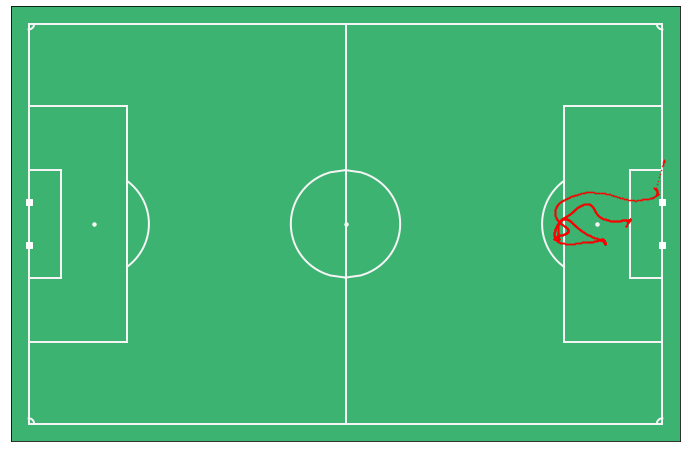

In [85]:
# Plot some player trajectories (players 11,1,2,3,4)
fig,ax = mviz.plot_pitch()
ax.plot( tracking_home['Home_11_x'].iloc[:1500], tracking_home['Home_11_y'].iloc[:1500], 'r.', MarkerSize=1)
# ax.plot( tracking_home['Home_1_x'].iloc[:1500], tracking_home['Home_1_y'].iloc[:1500], 'b.', MarkerSize=1)
# ax.plot( tracking_home['Home_2_x'].iloc[:1500], tracking_home['Home_2_y'].iloc[:1500], 'g.', MarkerSize=1)
# ax.plot( tracking_home['Home_3_x'].iloc[:1500], tracking_home['Home_3_y'].iloc[:1500], 'k.', MarkerSize=1)
# ax.plot( tracking_home['Home_4_x'].iloc[:1500], tracking_home['Home_4_y'].iloc[:1500], 'c.', MarkerSize=1)

C:\Users\SATYAKI\Desktop\Sports_Analytics\football\Metrica_Viz.py:141: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
C:\Users\SATYAKI\Desktop\Sports_Analytics\football\Metrica_Viz.py:141: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
C:\Users\SATYAKI\Desktop\Sports_Analytics\football\Metrica_Viz.py:149: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( hometeam['ball_x'], hometeam['ball_y'], 'ko', MarkerSize=6, alpha=1.0, LineWidth=0)


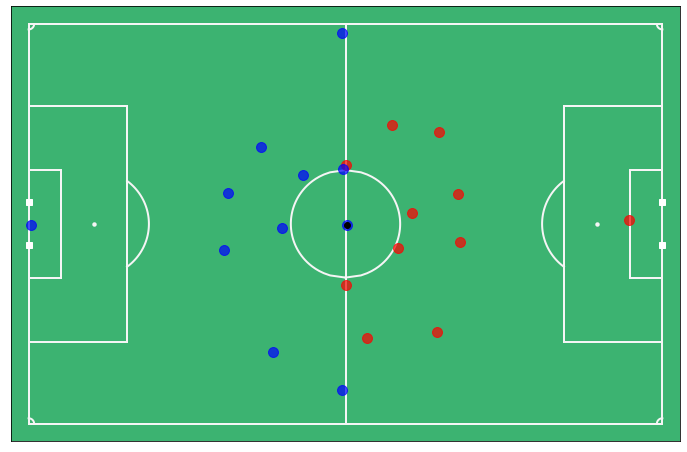

In [147]:
# plot player positions at ,atckick-off
KO_Frame = events.loc[0]['Start Frame']
fig,ax = mviz.plot_frame( tracking_home.loc[KO_Frame], tracking_away.loc[KO_Frame] )

### Exercise

In [93]:
# Plot the second goal

Text(44.52, 2.719999999999999, '')

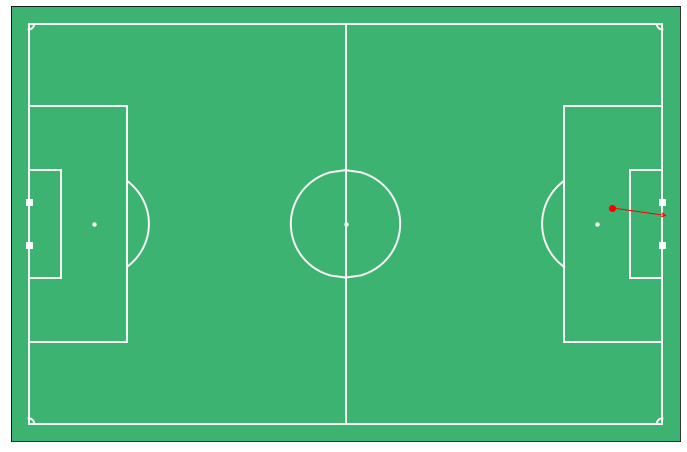

In [88]:
#Shot
fig,ax = mviz.plot_pitch()
ax.plot( events.loc[823]['Start X'], events.loc[823]['Start Y'],'ro' )
ax.annotate("", xy=events.loc[823][['End X','End Y']], xytext=events.loc[823][['Start X','Start Y']], alpha=0.6, arrowprops=dict(arrowstyle="->",color='r'))

(<Figure size 864x576 with 1 Axes>, <AxesSubplot:>)

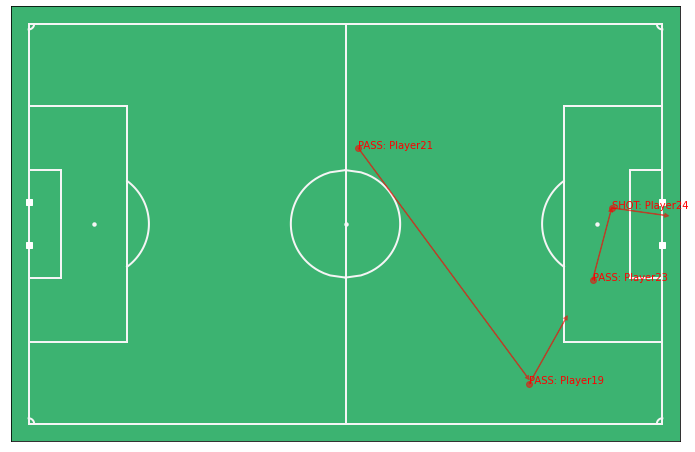

In [92]:
# plot passing move in run up to goal
mviz.plot_events( events.loc[820:823], indicators = ['Marker','Arrow'], annotate=True )

In [122]:
#plot all shots of player 9 .Use a diff symbol and transperancy that resulted to goal

In [127]:
#plotting all the shots of player 9

In [128]:
#getting home events
home_events = events[events['Team']=='Home']

In [129]:
#getting home shots
home_shots = home_events[home_events.Type=='SHOT']

In [133]:
home_shots

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
83,Home,SHOT,OFF TARGET-OUT,1,4419,176.76,4443,177.72,Player5,NaN,-39.22,18.36,-55.12,2.72
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,-47.70,-3.40,-54.06,-2.04
252,Home,SHOT,ON TARGET-SAVED,1,16484,659.36,16499,659.96,Player10,NaN,-41.34,11.56,-48.76,0.68
431,Home,SHOT,HEAD-OFF TARGET-OUT,1,27345,1093.80,27360,1094.40,Player3,NaN,-43.46,-6.12,-54.06,-6.12
472,Home,SHOT,ON TARGET-SAVED,1,29754,1190.16,29777,1191.08,Player4,NaN,-31.80,-13.60,-53.00,-2.72
852,Home,SHOT,HEAD-OFF TARGET-OUT,1,56079,2243.16,56131,2245.24,Player5,NaN,-42.40,6.12,-55.12,-17.68
1026,Home,SHOT,OFF TARGET-OUT,1,67067,2682.68,67107,2684.28,Player7,NaN,-39.22,-18.36,-55.12,6.12
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.80,Player9,NaN,47.70,-1.36,54.06,-2.04
1479,Home,SHOT,ON TARGET-SAVED,2,98880,3955.20,98896,3955.84,Player10,NaN,48.76,4.08,51.94,3.40
1681,Home,SHOT,HEAD-OFF TARGET-OUT,2,117218,4688.72,117245,4689.80,Player9,NaN,41.34,-7.48,54.06,5.44


In [134]:
#get the shot that led to the goal
# Get the shots that led to a goal
player9_goals = home_shots[home_shots['Subtype'].str.contains('-GOAL')].copy()

Text(21.199999999999996, -1.3600000000000012, '')

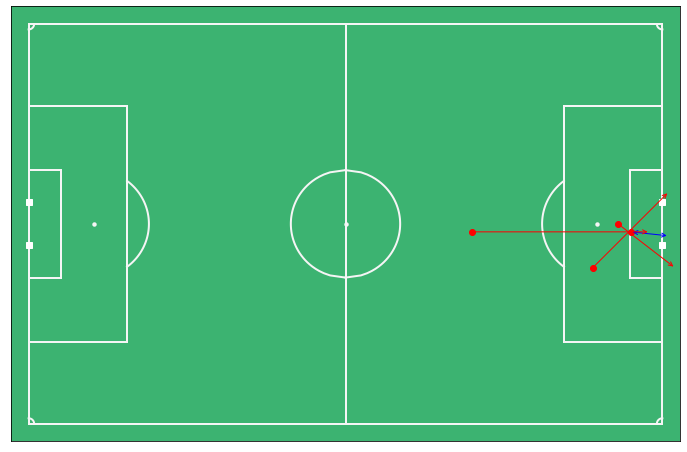

In [141]:
# Plot player 9 shots and goal
fig,ax = mviz.plot_pitch()
ax.plot( events.loc[1118]['Start X'], events.loc[1118]['Start Y'], 'ro' )
ax.annotate("", xy=events.loc[1118][['End X','End Y']], xytext=events.loc[1118][['Start X','Start Y']], alpha=0.2, arrowprops=dict(arrowstyle="<->",color='b'))

ax.plot( events.loc[1681]['Start X'], events.loc[1681]['Start Y'], 'ro' )
ax.annotate("", xy=events.loc[1681][['End X','End Y']], xytext=events.loc[1681][['Start X','Start Y']], alpha=0.6, arrowprops=dict(arrowstyle="->",color='r'))

ax.plot( events.loc[1756]['Start X'], events.loc[1756]['Start Y'], 'ro' )
ax.annotate("", xy=events.loc[1756][['End X','End Y']], xytext=events.loc[1756][['Start X','Start Y']], alpha=0.6, arrowprops=dict(arrowstyle="->",color='r'))

ax.plot( events.loc[1927]['Start X'], events.loc[1927]['Start Y'], 'ro' )
ax.annotate("", xy=events.loc[1927][['End X','End Y']], xytext=events.loc[1927][['Start X','Start Y']], alpha=0.6, arrowprops=dict(arrowstyle="->",color='r'))


C:\Users\SATYAKI\Desktop\Sports_Analytics\football\Metrica_Viz.py:141: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
C:\Users\SATYAKI\Desktop\Sports_Analytics\football\Metrica_Viz.py:141: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
C:\Users\SATYAKI\Desktop\Sports_Analytics\football\Metrica_Viz.py:149: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( hometeam['ball_x'], hometeam['ball_y'], 'ko', MarkerSize=6, alpha=1.0, LineWidth=0)


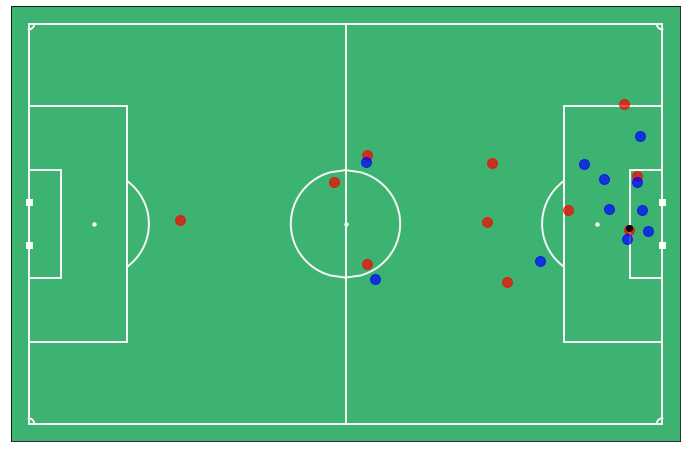

In [154]:
# plot player positions at No.9's Goal

#GO_Frame = events.loc[0]['Start Frame']
fig,ax = mviz.plot_frame( tracking_home.loc[73983], tracking_away.loc[73983] )